In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

from word2vec_vectorizer import Word2VecVectorizer
from functions import *

2024-11-18 23:58:24.338111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731970704.358182   45793 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731970704.364018   45793 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 23:58:24.382786: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../data/clean/dataset.csv').fillna('').sample(frac=1, random_state=314).reset_index(drop=True)

In [3]:
df

,name,url,title,lemmes,funny
0,la_depeche,https://www.ladepeche.fr/2024/09/29/145-person...,145 personnes ont donné leur sang en trois jours,personne donner sang jour,0
1,le_parisien,https://www.leparisien.fr/essonne-91/juvisy-su...,Juvisy-sur-Orge : il crache sur des policiers ...,juvisy-sur-orge cracher policier annoncer sero...,0
2,le_parisien,https://www.leparisien.fr/faits-divers/8-avril...,8 avril 1979 : le « tueur de l’Oise » arrêté...,avril tueur oise arrete assassin eter gendarme,0
3,la_depeche,https://www.ladepeche.fr/2024/10/09/grande-soi...,"Grande soirée théâtre, samedi 19",grand soiree theatre samedi,0
4,franceinfotv,https://www.francetvinfo.fr/les-jeux-olympique...,"Paris 2024 : près de 10 000 défilants, accès g...",paris defilant acces gratuit best of musical f...,0
...,...,...,...,...,...
106557,la_depeche,https://www.ladepeche.fr/2024/10/16/randonnee-...,Randonnée de la pleine lune,randonnee plein lune,0
106558,rfi,https://www.rfi.fr/fr/podcasts/la-marche-du-mo...,Tchad : quand les femmes prennent la voix du s...,tchad femme prendre voix syndicat,0
106559,rfi,https://www.rfi.fr/fr/podcasts/le-journal-d-ou...,Journal d'Outre-mer du 20 septembre 2024,journal outre-mer septembre,0
106560,le_parisien,https://www.leparisien.fr/val-de-marne-94/val-...,Val-de-Marne : le pont de Sucy-en-Brie rouvre ...,val-de-marne pont sucy-en-brie rouvrir circula...,0


In [4]:
embeddings = Word2VecVectorizer().fit_transform(df.lemmes)

/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1731970812.849708   45793 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1730 MB memory:  -> device: 0, name: NVIDIA GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1731970816.314853   47115 service.cc:148] XLA service 0x7f8b8c0041d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731970816.314879   47115 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce MX150, Compute Capability 6.1
I0000 00:00:1731970816.322726   47115 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-19 00:00:16.341436: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. B

<Figure size 800x600 with 0 Axes>

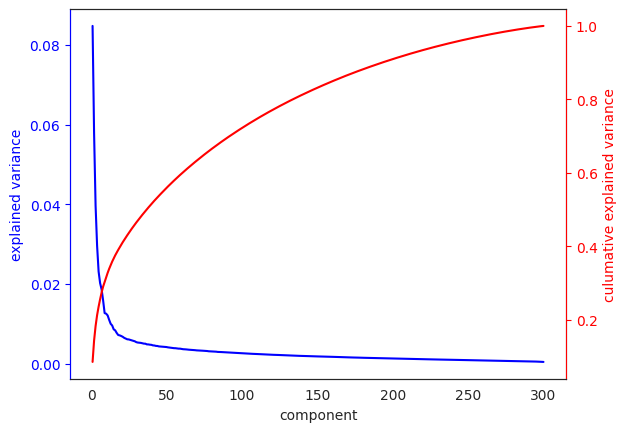

In [5]:
pca_graph(embeddings)

In [6]:
y = df.funny

In [7]:
umap_embedding = umap.UMAP(n_components=2, n_jobs=-1, verbose=1, random_state=314).fit_transform(embeddings)    

/home/michael/.pyenv/versions/funnypress-data-study/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=314, verbose=1)
Tue Nov 19 00:00:22 2024 Construct fuzzy simplicial set
Tue Nov 19 00:00:22 2024 Finding Nearest Neighbors
Tue Nov 19 00:00:22 2024 Building RP forest with 21 trees
Tue Nov 19 00:00:35 2024 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Tue Nov 19 00:01:04 2024 Finished Nearest Neighbor Search
Tue Nov 19 00:01:08 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Nov 19 00:04:02 2024 Finished embedding


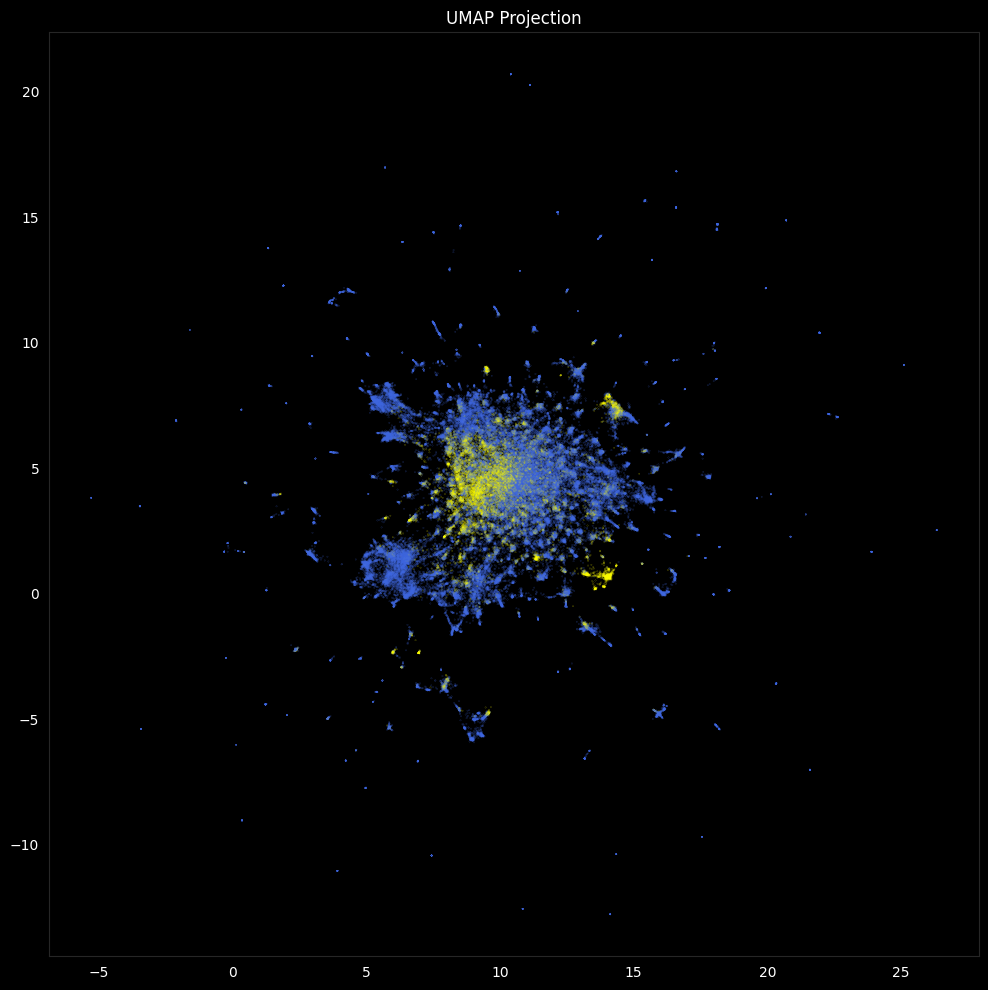

In [8]:
umap_graph(umap_embedding, y)